# Econometrics with R

## Chapter 6 ：Further Inference in Multiple Regression

### 6.2 Testing Simultaneous Hypotheses

In [6]:
rm(list=ls())
library(PoEdata) #for PoE datasets
library(knitr) #for referenced tables with kable() 
library(xtable) #makes data frame for kable 
library(printr) #automatically prints output nicely 
library(effects)
library(car)
library(AER)
library(broom) #for tidy lm output and function glance() 
library(stats) 

In [7]:
alpha <- 0.05
data("andy", package="PoEdata")
N <- NROW(andy) #Number of observations in dataset
K <- 4 #Four Betas in the unrestricted model
J <- 2 #Because Ho has two restrictions
fcr <- qf(1-alpha, J, N-K) # 分位数,or临界值
mod1 <- lm(sales~price+advert+I(advert^2), data=andy) 
anov <- anova(mod1)
anov # prints 'anova' table for the unrestricted model

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
price,1,1219.0910,1219.09103,56.495229,1.315140e-10
advert,1,177.4479,177.44790,8.223307,5.440600e-03
I(advert^2),1,186.8585,186.85848,8.659413,4.392666e-03
Residuals,71,1532.0845,21.57865,NA,NA


In [8]:
SSEu <- anov[4, 2]
mod2 <- lm(sales~price, data=andy) # restricted
anov <- anova(mod2)
anov # prints the 'anova' table for the restrictred model

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
price,1,1219.091,1219.09103,46.9279,1.970778e-09
Residuals,73,1896.391,25.97796,NA,NA


In [9]:
SSEr <- anov[2,2]
fval <- ((SSEr-SSEu)/J) / (SSEu/(N-K)) # 大于前面计算的 fcr
pval <- 1-pf(fval, J, N-K) # 小于给定的显著性水平：alpha=0.05
fval;pval

[1] 8.44136

[1] 0.0005141591

In [10]:
Hnull <- c("advert=0", "I(advert^2)=0") # 原假设
linearHypothesis(mod1,Hnull)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
73,1896.391,NA,NA,NA,NA
71,1532.084,2,364.3064,8.44136,0.0005141591


In [11]:
summary(mod1) # 或者使用broom包中的glance：glance(mod1) 
kable(tidy(summary(mod1)),caption="Tidy 'summary(mod1)' output")
fval<-summary(mod1)$fstatistic;fval
kable(tidy(mod1),caption="'Tidy(mod1)'output" )
glance(mod1)$statistic # names(glance(mod1))
kable(glance(mod1),caption="Function 'glance(mod1)'output",digits=2,col.names=(c("Rsq","AdjRsq",'sig','F','pF','df','logL','AIC','BIC','dev','df.res')))


Call:
lm(formula = sales ~ price + advert + I(advert^2), data = andy)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2553  -3.1430  -0.0117   2.8513  11.8050 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.7190     6.7990  16.137  < 2e-16 ***
price        -7.6400     1.0459  -7.304 3.24e-10 ***
advert       12.1512     3.5562   3.417  0.00105 ** 
I(advert^2)  -2.7680     0.9406  -2.943  0.00439 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.645 on 71 degrees of freedom
Multiple R-squared:  0.5082,	Adjusted R-squared:  0.4875 
F-statistic: 24.46 on 3 and 71 DF,  p-value: 5.6e-11




|term        |   estimate| std.error| statistic|   p.value|
|:-----------|----------:|---------:|---------:|---------:|
|(Intercept) | 109.719036|  6.799046| 16.137418| 0.0000000|
|price       |  -7.640000|  1.045939| -7.304442| 0.0000000|
|advert      |  12.151236|  3.556164|  3.416950| 0.0010516|
|I(advert^2) |  -2.767963|  0.940624| -2.942688| 0.0043927|

value    numdf    dendf 
24.45932  3.00000 71.00000



|term        |   estimate| std.error| statistic|   p.value|
|:-----------|----------:|---------:|---------:|---------:|
|(Intercept) | 109.719036|  6.799046| 16.137418| 0.0000000|
|price       |  -7.640000|  1.045939| -7.304442| 0.0000000|
|advert      |  12.151236|  3.556164|  3.416950| 0.0010516|
|I(advert^2) |  -2.767963|  0.940624| -2.942688| 0.0043927|

[1] 24.45932



|  Rsq| AdjRsq|  sig|     F| pF| df|    logL|    AIC|   BIC|     dev| df.res|
|----:|------:|----:|-----:|--:|--:|-------:|------:|-----:|-------:|------:|
| 0.51|   0.49| 4.65| 24.46|  0|  4| -219.55| 449.11| 460.7| 1532.08|     71|

In [12]:
hyp <- c("advert+3.8*I(advert^2)=1", "(Intercept)+6*price+1.9*advert+3.61*I(advert^2)=80") 
lhout <- tidy(linearHypothesis(mod1,hyp)) 
kable(lhout,caption="Joint hypotheses with the 'linearHypothesis' function")



| res.df|      rss| df|   sumsq| statistic|   p.value|
|------:|--------:|--:|-------:|---------:|---------:|
|     73| 1779.860| NA|      NA|        NA|        NA|
|     71| 1532.084|  2| 247.776|  5.741229| 0.0048847|

===========================================================================
### 6.3 Omitted Variable Bias

In [13]:
data("edu_inc", package="PoEdata")
mod1 <- lm(faminc~he+we, data=edu_inc)
mod2 <- lm(faminc~he, data=edu_inc) 
kable(tidy(mod1), caption="The correct model")
kable(tidy(mod2), caption="The incorrect model ('we' omitted)")



|term        |  estimate| std.error|  statistic|   p.value|
|:-----------|---------:|---------:|----------:|---------:|
|(Intercept) | -5533.629| 11229.533| -0.4927746| 0.6224263|
|he          |  3131.509|   802.908|  3.9002093| 0.0001117|
|we          |  4522.641|  1066.327|  4.2413281| 0.0000273|



|term        |  estimate| std.error| statistic|   p.value|
|:-----------|---------:|---------:|---------:|---------:|
|(Intercept) | 26191.270| 8541.1084|  3.066495| 0.0023038|
|he          |  5155.483|  658.4574|  7.829639| 0.0000000|

========================================================================
### 6.4 Irrelevant Variable

In [14]:
mod3 <- lm(faminc~he+we+kl6, data=edu_inc)
mod4 <- lm(faminc~he+we+kl6+xtra_x5+xtra_x6, data=edu_inc) 
kable(tidy(mod3), caption="Correct 'faminc' model")
kable(tidy(mod4),caption="Incorrect 'faminc' with irrelevant variables") # 增加两个不相关变量实际上是增加了参数估计的noise，主要是影响了标准误的估计，但对结果影响不是很大



|term        |   estimate|  std.error|  statistic|   p.value|
|:-----------|----------:|----------:|----------:|---------:|
|(Intercept) |  -7755.330| 11162.9346| -0.6947393| 0.4875992|
|he          |   3211.526|   796.7026|  4.0310216| 0.0000658|
|we          |   4776.907|  1061.1637|  4.5015744| 0.0000087|
|kl6         | -14310.921|  5003.9284| -2.8599372| 0.0044466|



|term        |    estimate| std.error|  statistic|   p.value|
|:-----------|-----------:|---------:|----------:|---------:|
|(Intercept) |  -7558.6131| 11195.411| -0.6751528| 0.4999484|
|he          |   3339.7921|  1250.039|  2.6717496| 0.0078378|
|we          |   5868.6772|  2278.067|  2.5761650| 0.0103294|
|kl6         | -14200.1839|  5043.720| -2.8154190| 0.0050996|
|xtra_x5     |    888.8426|  2242.491|  0.3963640| 0.6920369|
|xtra_x6     |  -1067.1856|  1981.685| -0.5385243| 0.5904991|

==================================================================
### 6.5 Model Selection Criteria
* R_square
* adjusted R_square
* AIC (minimize AIC & BIC)
* BIC
* Ramsey specification test (RESET). This method automatically adds higher-order polynomial terms to model and tests the joint hypothesis that their coefficients are all zeros.

In [15]:
mod1 <- lm(faminc~he, data=edu_inc)
mod2 <- lm(faminc~he+we, data=edu_inc)
mod3 <- lm(faminc~he+we+kl6, data=edu_inc)
mod4 <- lm(faminc~he+we+kl6+xtra_x5+xtra_x6, data=edu_inc) 
r1 <- as.numeric(glance(mod1))
r2 <- as.numeric(glance(mod2))
r3 <- as.numeric(glance(mod3))
r4 <- as.numeric(glance(mod4))
tab <- data.frame(rbind(r1, r2, r3, r4))[,c(1,2,8,9)] 
row.names(tab) <- c("he","he, we","he, we, kl6",
                    "he, we, kl6, xtra_x5, xtra_x6")
kable(tab,
caption="Model comparison, 'faminc' ", digits=4, col.names=c("Rsq","AdjRsq","AIC","BIC"))



|                              |    Rsq| AdjRsq|      AIC|      BIC|
|:-----------------------------|------:|------:|--------:|--------:|
|he                            | 0.1258| 0.1237| 10316.65| 10328.83|
|he, we                        | 0.1613| 0.1574| 10300.91| 10317.15|
|he, we, kl6                   | 0.1772| 0.1714| 10294.73| 10315.03|
|he, we, kl6, xtra_x5, xtra_x6 | 0.1778| 0.1681| 10298.41| 10326.82|

In [22]:
library(stats)
smod1 <- summary(mod1)
Rsq <- smod1$r.squared
AdjRsq <- smod1$adj.r.squared
aic <- AIC (mod1)
bic <- BIC (mod1)
c (Rsq, AdjRsq, aic, bic)

[1] 1.258010e-01 1.237489e-01 1.031665e+04 1.032883e+04

In [26]:
mod3 <- lm (faminc~he+we+kl6, data=edu_inc)
resettest (mod3, power=2, type="fitted")
resettest (mod3, power=2:3, type="fitted")


	RESET test

data:  mod3
RESET = 5.984, df1 = 1, df2 = 423, p-value = 0.01484



	RESET test

data:  mod3
RESET = 3.1226, df1 = 2, df2 = 422, p-value = 0.04506


=============================================================
### 6.6 Collinearity
* variance inflation factor,VIF. The rule of thumb is that a regressor producs collinearity if its VIF is greater than 10.$$VIF_k=\frac{1}{1-R^2_k}$$


In [28]:
data ("cars", package="PoEdata")
mod1 <- lm (mpg~cyl, data=cars)
kable ( tidy (mod1), caption="A simple linear 'mpg' model")
mod2 <- lm (mpg~cyl+eng+wgt, data=cars) # cyl 变得不再显著了
kable ( tidy (mod2), caption="Multivariate 'mpg' model")



|term        |  estimate| std.error| statistic| p.value|
|:-----------|---------:|---------:|---------:|-------:|
|(Intercept) | 42.915505| 0.8348668|  51.40401|       0|
|cyl         | -3.558078| 0.1456755| -24.42468|       0|



|term        |   estimate| std.error|  statistic|   p.value|
|:-----------|----------:|---------:|----------:|---------:|
|(Intercept) | 44.3709616| 1.4806851| 29.9665086| 0.0000000|
|cyl         | -0.2677968| 0.4130673| -0.6483126| 0.5171663|
|eng         | -0.0126740| 0.0082501| -1.5362247| 0.1252983|
|wgt         | -0.0057079| 0.0007139| -7.9951428| 0.0000000|

In [29]:
mod2 <- lm (mpg~cyl+eng+wgt, data=cars)
tab <- tidy ( vif (mod2)) # cyl 和 eng 未通过 VIF test
kable (tab,
caption="Variance inflation factors for the 'mpg' regression model",
col.names= c ("regressor","VIF"))



|regressor |       VIF|
|:---------|---------:|
|cyl       | 10.515508|
|eng       | 15.786455|
|wgt       |  7.788716|

============================================================
### 6.7 Prediction and Forecasting

In [30]:
predpoint <- data.frame (price=6, advert=1.9)
mod3 <- lm (sales~price+advert+ I (advert^2), data=andy)
kable ( tidy ( predict (mod3, newdata=predpoint,
interval="prediction")),
caption="Forecasting in the quadratic 'andy' model")



|      fit|      lwr|      upr|
|--------:|--------:|--------:|
| 76.97404| 67.53258| 86.41549|

## Chapter 7 Using Indicator Variables
* this chapter introduces the package __lmtest__ (Hothorn et al.2015)
* in R, an indicator variable is called *factor*,*category*,or *enumerated type* and there is no distinction between binary or multiple-category factors
* factors can be either numerical or character variables, ordered or not.
### 7.1 Factor Variables

In [33]:
rm (list= ls ())
library (bookdown)
library (PoEdata)#for PoE datasets
library (knitr) #for referenced tables with kable()
library (xtable) #makes data frame for kable
library (printr) #automatically prints output nicely
library (effects)
library (car)
library (AER)
library (broom) #for tidy lm output and function glance()
library (stats)
library (lmtest)#for coeftest() and other test functions
library (stargazer) #nice and informative tables

Warning message:
"package 'stargazer' was built under R version 3.4.3"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.1. https://CRAN.R-project.org/package=stargazer 



In [35]:
library (ggplot2)
data ("utown", package="PoEdata")
utown$utown <- as.factor (utown$utown)
utown$pool <- as.factor (utown$pool)
utown$fplace <- as.factor (utown$fplace)
kable ( summary.data.frame (utown),
caption="Summary for 'utown' dataset")



|   |    price     |     sqft     |     age       |utown |pool  |fplace |
|:--|:-------------|:-------------|:--------------|:-----|:-----|:------|
|   |Min.   :134.3 |Min.   :20.03 |Min.   : 0.000 |0:481 |0:796 |0:482  |
|   |1st Qu.:215.6 |1st Qu.:22.83 |1st Qu.: 3.000 |1:519 |1:204 |1:518  |
|   |Median :245.8 |Median :25.36 |Median : 6.000 |NA    |NA    |NA     |
|   |Mean   :247.7 |Mean   :25.21 |Mean   : 9.392 |NA    |NA    |NA     |
|   |3rd Qu.:278.3 |3rd Qu.:27.75 |3rd Qu.:13.000 |NA    |NA    |NA     |
|   |Max.   :345.2 |Max.   :30.00 |Max.   :60.000 |NA    |NA    |NA     |

==============================================================================
### 7.2 Examples

In [47]:
# example 1
mod4 <- lm (price~utown*sqft+age+pool+fplace, data=utown)
kable ( tidy (mod4), caption="The 'house prices' model")
bsqft <- 1000* coef (mod4)[["sqft"]]
bsqft1 <- 1000*( coef (mod4)[["sqft"]]+ coef(mod4)[["utown:sqft"]])



|term        |   estimate| std.error| statistic|   p.value|
|:-----------|----------:|---------:|---------:|---------:|
|(Intercept) | 24.4999849| 6.1917214|  3.956894| 0.0000813|
|utown       | 27.4529522| 8.4225824|  3.259446| 0.0011542|
|sqft        |  7.6121766| 0.2451765| 31.047746| 0.0000000|
|age         | -0.1900864| 0.0512046| -3.712291| 0.0002168|
|pool        |  4.3771633| 1.1966916|  3.657720| 0.0002678|
|fplace      |  1.6491756| 0.9719568|  1.696758| 0.0900558|
|utown:sqft  |  1.2994049| 0.3320478|  3.913307| 0.0000972|

In [50]:
# example 2
data ("cps4_small", package="PoEdata")
names (cps4_small)
mod5 <- lm (wage~educ+black*female, data=cps4_small)
delta1 <- coef (mod5)[["black"]]
delta2 <- coef (mod5)[["female"]]
gamma <- coef (mod5)[["black:female"]]
blfm <- delta1+delta2+gamma
kable ( tidy (mod5), caption="A wage-discrimination model")

[1] "wage"    "educ"    "exper"   "hrswk"   "married" "female"  "metro"  
 [8] "midwest" "south"   "west"    "black"   "asian"



|term         |  estimate| std.error| statistic|   p.value|
|:------------|---------:|---------:|---------:|---------:|
|(Intercept)  | -5.281159| 1.9004677| -2.778873| 0.0055575|
|educ         |  2.070391| 0.1348781| 15.350089| 0.0000000|
|black        | -4.169077| 1.7747139| -2.349155| 0.0190109|
|female       | -4.784607| 0.7734139| -6.186348| 0.0000000|
|black:female |  3.844294| 2.3276528|  1.651575| 0.0989367|

In [51]:
hyp <- c ("black=0", "female=0", "black:female=0")
tab <- tidy ( linearHypothesis (mod5, hyp))
kable (tab,
caption="Testing a joint hypothesis for the 'wage' equation")



| res.df|      rss| df|    sumsq| statistic| p.value|
|------:|--------:|--:|--------:|---------:|-------:|
|    998| 135771.1| NA|       NA|        NA|      NA|
|    995| 130194.7|  3| 5576.473|  14.20588|       0|

==========================================================================
### 7.3 Comparing two Regressions: the Chow Test

In [66]:
dnosouth <- cps4_small[ which (cps4_small$south==0),]#no south
dsouth <- cps4_small[ which (cps4_small$south==1),] #south
mod5ns <- lm (wage~educ+black*female, data=dnosouth)
mod5s <- lm (wage~educ+black*female, data=dsouth)
mod6 <- lm (wage~educ+black*female+south/(educ+black*female),data=cps4_small)
#stargazer(mod6, mod5ns, mod5s, header=FALSE,type='html',title="Model comparison, 'wage' equation",keep.stat="n",digits=2, single.row=TRUE,intercept.bottom=FALSE,out="models.htm")
stargazer(mod6, mod5ns, mod5s, header=FALSE,type='text',title="Model comparison, 'wage' equation",keep.stat="n",digits=2, single.row=TRUE,intercept.bottom=FALSE)
kable (anova (mod5, mod6),caption="Chow test for the 'wage' equation") # ? Chow test ——》anova (mod5, mod6) ？？？


Model comparison, 'wage' equation
                                 Dependent variable:              
                   -----------------------------------------------
                                        wage                      
                         (1)             (2)             (3)      
------------------------------------------------------------------
Constant           -6.61*** (2.34) -6.61*** (2.30)  -2.66 (3.42)  
educ               2.17*** (0.17)  2.17*** (0.16)  1.86*** (0.24) 
black               -5.09* (2.64)   -5.09* (2.60)   -3.38 (2.58)  
female             -5.01*** (0.90) -5.01*** (0.89) -4.10*** (1.58)
south                3.94 (4.05)                                  
black:female         5.31 (3.50)     5.31 (3.45)     2.37 (3.38)  
educ:south          -0.31 (0.29)                                  
black:south          1.70 (3.63)                                  
female:south         0.90 (1.77)                                  
black:female:south  -2.94 (



| Res.Df|      RSS| Df| Sum of Sq|         F|    Pr(>F)|
|------:|--------:|--:|---------:|---------:|---------:|
|    995| 130194.7| NA|        NA|        NA|        NA|
|    990| 129984.4|  5|  210.2582| 0.3202779| 0.9009447|

===================================================================
### 7.4 Indicator Variables in Log-Linear Models

In [69]:
data ("cps4_small", package="PoEdata")
mod1 <- lm ( log (wage)~educ+female, data=cps4_small)
approx <- 100* coef (mod1)[["female"]]
exact <- 100*( exp ( coef (mod1)[["female"]])-1)

===================================================================
### 7.5 The Linear Probability Model



|term        |   estimate| std.error| statistic|   p.value|
|:-----------|----------:|---------:|---------:|---------:|
|(Intercept) |  0.8902151| 0.0654849| 13.594207| 0.0000000|
|pratio      | -0.4008614| 0.0613494| -6.534067| 0.0000000|
|disp_coke   |  0.0771745| 0.0343919|  2.243970| 0.0250263|
|disp_pepsi  | -0.1656637| 0.0355997| -4.653517| 0.0000036|

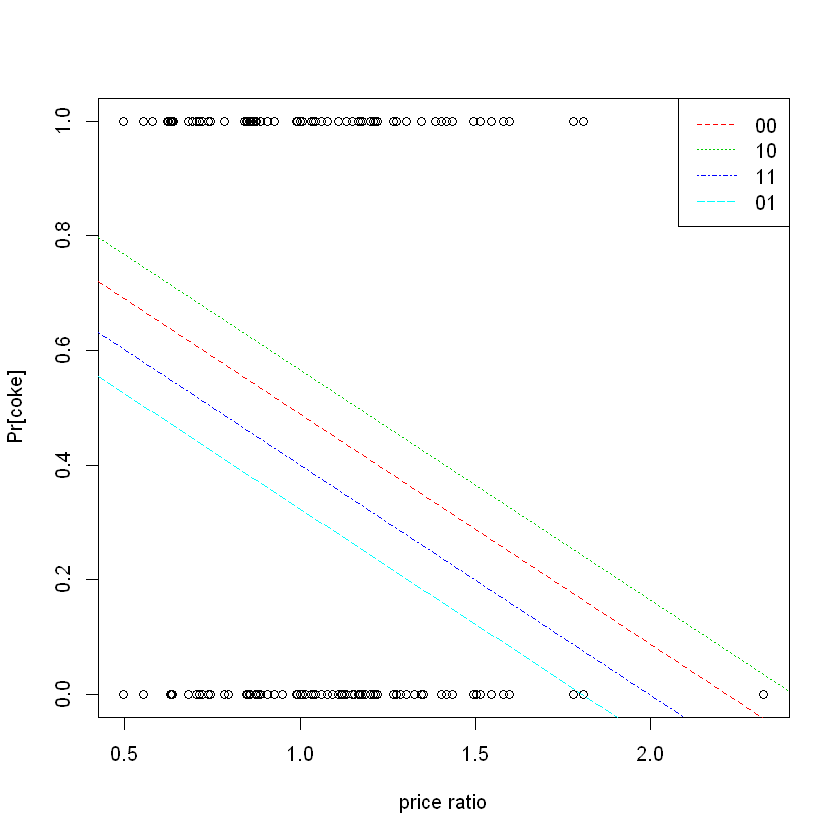

In [70]:
# Linear probability example
data ("coke", package="PoEdata")
mod2 <- lm (coke~pratio+disp_coke+disp_pepsi, data=coke)
kable ( tidy (mod2),
caption="Linear probability model, the 'coke' example")

# Graph for the linear probability model
b00 <- coef (mod2)[[1]]
b10 <- b00+ coef (mod2)[["disp_coke"]]
b11 <- b10+ coef (mod2)[["disp_pepsi"]]
b01 <-b11- coef (mod2)[["disp_coke"]]
b2 <- coef (mod2)[["pratio"]]
plot (coke$pratio, coke$coke,
ylab="Pr[coke]", xlab="price ratio")
abline (b00, b2, lty=2, col=2)
abline (b10,b2, lty=3, col=3)
abline (b11,b2, lty=4, col=4)
abline (b01,b2, lty=5, col=5)
legend ("topright", c ("00","10","11","01"),
lty= c (2,3,4,5), col= c (2,3,4,5))

===================================================================
### 7.6 Treatment Effects

In [74]:
# Project STAR, an application of the simple difference estimator
data ("star", package="PoEdata")
attach (star)
vars <- c ("totalscore","small","tchexper","boy",
"freelunch","white_asian","tchwhite","tchmasters",
"schurban","schrural")
starregular <- star[ which (small==0),vars]
starsmall <- star[ which (small==1),vars]
detach (star)
stargazer (starregular, type='text', header=FALSE,
    title="Dataset 'star' for regular classes")
stargazer (starsmall, type='text', header=FALSE,title="Dataset 'star' for small classes")


Dataset 'star' for regular classes
Statistic     N    Mean   St. Dev. Min  Max 
--------------------------------------------
totalscore  4,048 918.201  72.214  635 1,253
small       4,048  0.000   0.000    0    0  
tchexper    4,028  9.441   5.779    0   27  
boy         4,048  0.513   0.500    0    1  
freelunch   4,048  0.486   0.500    0    1  
white_asian 4,048  0.673   0.469    0    1  
tchwhite    4,048  0.824   0.381    0    1  
tchmasters  4,048  0.366   0.482    0    1  
schurban    4,048  0.316   0.465    0    1  
schrural    4,048  0.475   0.499    0    1  
--------------------------------------------

Dataset 'star' for small classes
Statistic     N    Mean   St. Dev. Min  Max 
--------------------------------------------
totalscore  1,738 931.942  76.359  747 1,253
small       1,738  1.000   0.000    1    1  
tchexper    1,738  8.995   5.732    0   27  
boy         1,738  0.515   0.500    0    1  
freelunch   1,738  0.472   0.499    0    1  
white_asian 1,738  0.685   0.4

In [76]:
mod3 <- lm (totalscore~small, data=star)
b2 <- coef (mod3)[["small"]];b2

[1] 13.74055

In [77]:
school <- as.factor (star$schid)#creates dummies for schools
mod4 <- lm (totalscore~small+tchexper, data=star)
mod5 <- lm (totalscore~small+tchexper+school, data=star)
b2n <- coef (mod4)[["small"]]
b2s <- coef (mod5)[["small"]]
anova (mod4, mod5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
5763,30777461,NA,NA,NA,NA
5685,24072033,78,6705428,20.3025,1.431626e-242


In [78]:
mod6 <- lm (small~boy+white_asian+tchexper+freelunch, data=star)
kable ( tidy (mod6),
caption="Checking random assignment in the 'star' dataset")
fstat <- glance (mod6)$statistic
pf <- glance (mod6)$p.value



|term        |   estimate| std.error|  statistic|   p.value|
|:-----------|----------:|---------:|----------:|---------:|
|(Intercept) |  0.3251669| 0.0188346| 17.2643537| 0.0000000|
|boy         | -0.0002542| 0.0120979| -0.0210144| 0.9832349|
|white_asian |  0.0123603| 0.0144885|  0.8531097| 0.3936339|
|tchexper    | -0.0029793| 0.0010545| -2.8252420| 0.0047407|
|freelunch   | -0.0087997| 0.0135262| -0.6505699| 0.5153501|

===================================================================
### 7.7 The Difference-in-Differences Estimator

In [80]:
data ("njmin3", package="PoEdata")
mod1 <- lm (fte~nj*d, data=njmin3)
mod2 <- lm (fte~nj*d+
kfc+roys+wendys+co_owned, data=njmin3)
mod3 <- lm (fte~nj*d+
kfc+roys+wendys+co_owned+
southj+centralj+pa1, data=njmin3)
stargazer (mod1,mod2,mod3,
    type='text',
    title="Difference in Differences example",
    header=FALSE, keep.stat="n",digits=2
    # single.row=TRUE, intercept.bottom=FALSE
)
# t-ratio for delta, the D-in-D estimator:
tdelta <- summary (mod1)$coefficients[4,3]


Difference in Differences example
                  Dependent variable:     
             -----------------------------
                          fte             
                (1)       (2)       (3)   
------------------------------------------
nj            -2.89**   -2.38**    -0.91  
              (1.19)    (1.08)    (1.27)  
                                          
d              -2.17     -2.22     -2.21  
              (1.52)    (1.37)    (1.35)  
                                          
kfc                    -10.45*** -10.06***
                        (0.85)    (0.84)  
                                          
roys                    -1.62*    -1.69** 
                        (0.86)    (0.86)  
                                          
wendys                   -1.06     -1.06  
                        (0.93)    (0.92)  
                                          
co_owned                 -1.17     -0.72  
                        (0.72)    (0.72)  
                   

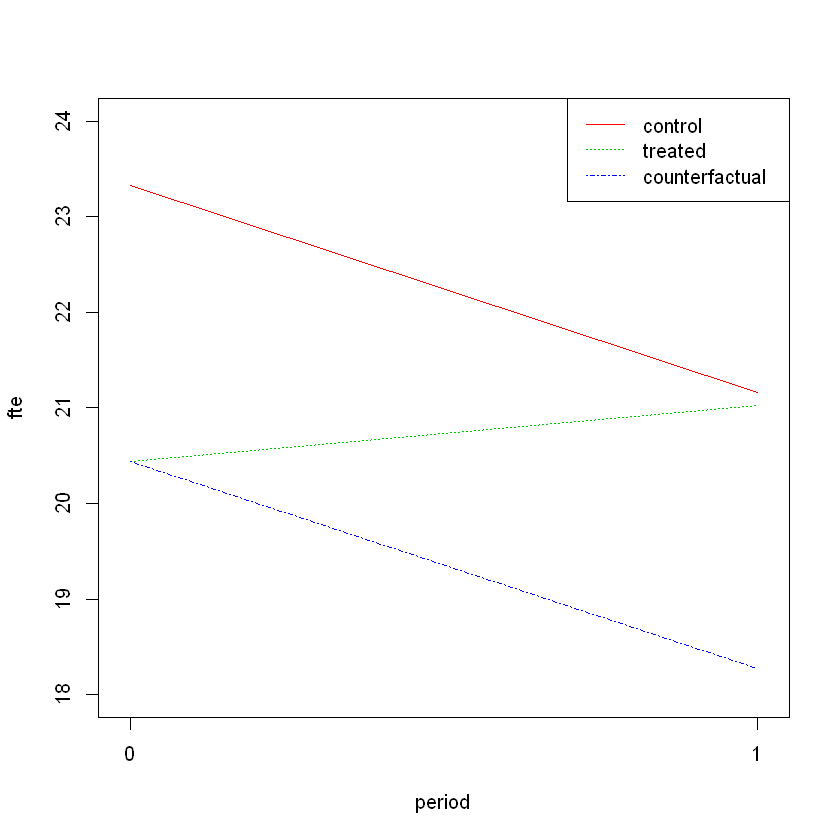

In [81]:
b1 <- coef (mod1)[[1]]
b2 <- coef (mod1)[["nj"]]
b3 <- coef (mod1)[["d"]]
delta <- coef (mod1)[["nj:d"]]
C <- b1+b2+b3+delta
E <- b1+b3
B <- b1+b2
A <- b1
D <- E+(B-A)
# This creates an empty plot:
plot (1, type="n", xlab="period", ylab="fte", xaxt="n",
xlim= c (-0.01, 1.01), ylim= c (18, 24))
segments (x0=0, y0=A, x1=1, y1=E, lty=1, col=2)#control
segments (x0=0, y0=B, x1=1, y1=C, lty=3, col=3)#treated
segments (x0=0, y0=B, x1=1, y1=D, #counterfactual
lty=4, col=4)
legend ("topright", legend= c ("control", "treated",
    "counterfactual"), lty= c (1,3,4), col= c (2,3,4))
axis (side=1, at= c (0,1), labels=NULL)

===============================================================
### 7.8 Using Panel Data

In [86]:
mod3 <- lm (demp~nj, data=njmin3)
kable ( tidy ( summary (mod3)),caption="Difference in differences with panel data")
(smod3 <- summary (mod3))



|term        |  estimate| std.error| statistic|   p.value|
|:-----------|---------:|---------:|---------:|---------:|
|(Intercept) | -2.283333| 0.7312577| -3.122474| 0.0018608|
|nj          |  2.750000| 0.8151862|  3.373462| 0.0007796|


Call:
lm(formula = demp ~ nj, data = njmin3)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.217  -3.967   0.533   4.533  33.533 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2833     0.7313  -3.122  0.00186 ** 
nj            2.7500     0.8152   3.373  0.00078 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.956 on 766 degrees of freedom
  (52 observations deleted due to missingness)
Multiple R-squared:  0.01464,	Adjusted R-squared:  0.01335 
F-statistic: 11.38 on 1 and 766 DF,  p-value: 0.0007796


===================================================================
### 7.9 R Practicum
#### 7.9.1 Extracting Various Information
* focus on how to extract various results after fitting a linear model

In [90]:
mod5 <- lm (wage~educ+black*female, data=cps4_small)
smod5 <- summary (mod5)
gmod5 <- glance (mod5) #from package 'broom'
'====================================================='
names (mod5)
'====================================================='
names(smod5)
'====================================================='
names(gmod5)
'====================================================='
head(mod5$fitted.values)
head(mod5$residuals)
smod5$r.squared
smod5$fstatistic
gmod5$statistic
mod5$df.residual

[1] "====================================================="

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] "====================================================="

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

[1] "====================================================="

[1] "r.squared"     "adj.r.squared" "sigma"         "statistic"    
 [5] "p.value"       "df"            "logLik"        "AIC"          
 [9] "BIC"           "deviance"      "df.residual"

In [98]:
N <- nobs (mod5)
yhat <- fitted (mod5) # fitted values
ehat <- resid (mod5) # estimated residuals
allcoeffs <- coef (mod5) # only coefficients, no statistics
coef (mod5)[[2]] #or: coef(mod5)[['educ']]
coeftest(mod5) # or: tidy(mod5)

[1] 2.070391


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  -5.28116    1.90047 -2.7789  0.005557 ** 
educ          2.07039    0.13488 15.3501 < 2.2e-16 ***
black        -4.16908    1.77471 -2.3492  0.019011 *  
female       -4.78461    0.77341 -6.1863 8.981e-10 ***
black:female  3.84429    2.32765  1.6516  0.098937 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


term,estimate,std.error,statistic,p.value
(Intercept),-5.281159,1.9004677,-2.778873,5.557491e-03
educ,2.070391,0.1348781,15.350089,6.909391e-48
black,-4.169077,1.7747139,-2.349155,1.901086e-02
female,-4.784607,0.7734139,-6.186348,8.981371e-10
black:female,3.844294,2.3276528,1.651575,9.893669e-02


#### 7.9.2 ggplot2(详见另外的教程)

## Chapter 8 Heteroskedasticity

In [99]:
rm (list= ls ()) #Removes all items in Environment!
library (lmtest) #for coeftest() and bptest().
library (broom) #for glance() and tidy()
library (PoEdata) #for PoE4 datasets
library (car) #for hccm() robust standard errors
library (sandwich)
library (knitr)
library (stargazer)

### 8.1 Spotting Heteroskedasticity in the Scatter Plots

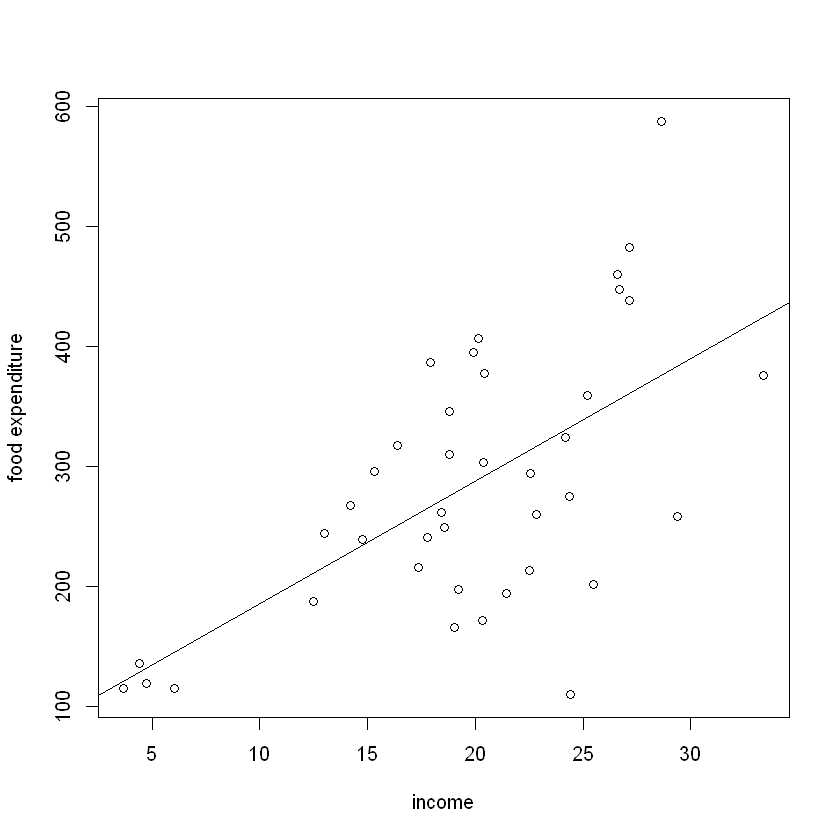

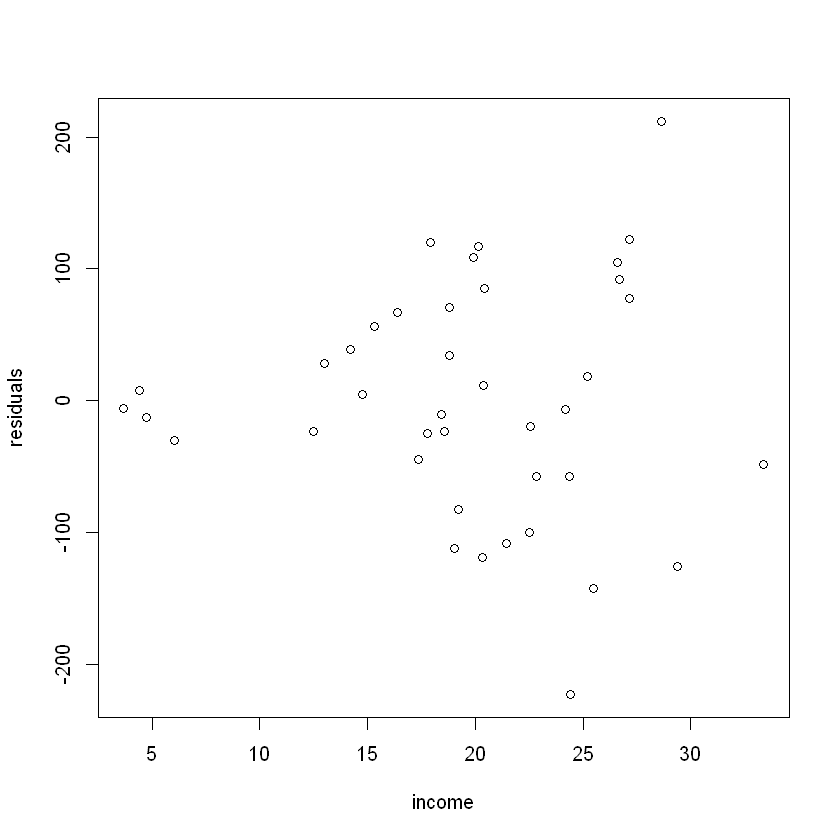

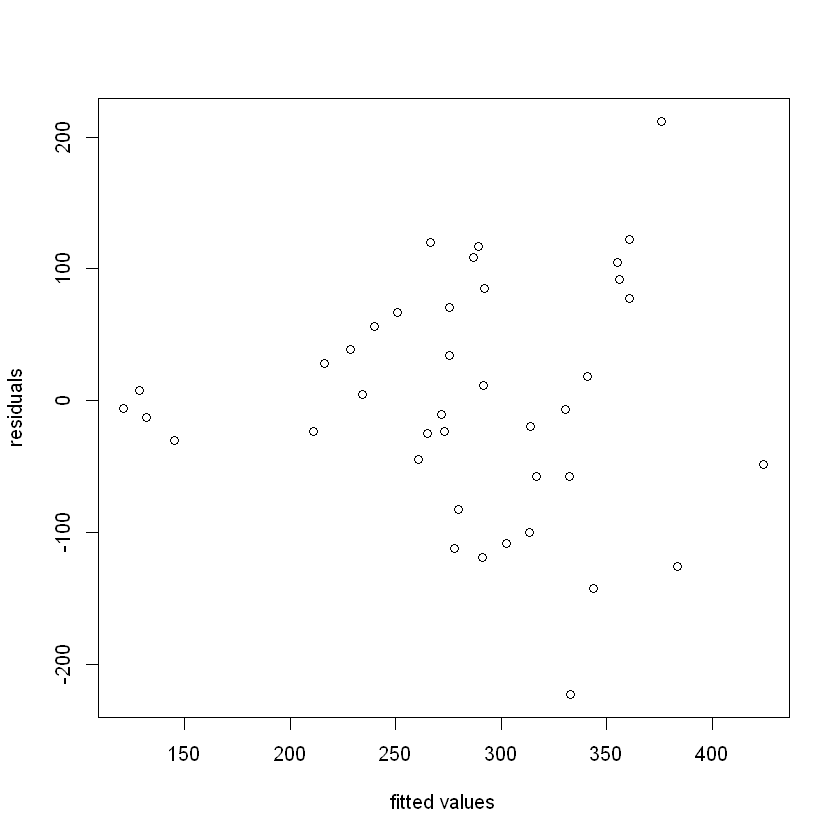

In [101]:
data ("food",package="PoEdata")
mod1 <- lm (food_exp~income, data=food)
plot (food$income,food$food_exp, type="p",
xlab="income", ylab="food expenditure")
abline (mod1)
# 或者，可以画出 x-residual的关系图，或 fitted_value-residual的关系图
res <- residuals (mod1)
yhat <- fitted (mod1)
plot (food$income,res, xlab="income", ylab="residuals")
plot (yhat,res, xlab="fitted values", ylab="residuals")

### 8.2 Heteroskedasticity Tests
* __Breusch-Pagan__ heteroskedasticity test：The test we are construction assumes that the variance of the errors is a function h of a number of regressors $z_s$, which may or may not be present in the initial regression model that we want to test.$$\hat{e}^2_i=\alpha_1+\alpha_2z_{i2}+\dots+\alpha_Sz_{iS}+v_i$$
$$\chi^2=N\times R^2 \sim \chi^2_{(S-1)}$$ 事实上， package __lmtest__ 中的 bptest()就是Breusch-Pagan test
* __Goldfeld-Quandt__ test：The Goldfeld-Quandt heteroskedasticity test is useful when the regression model
to be tested includes an indicator variable among its regressors. The test compares
the variance of one group of the indicator variable (say group 1) to the variance of
the benchmark group (say group 0).【The Goldfeld-Quant test can be used even when there is no indicator variable in
the model or in the dataset. One can split the dataset in two using an arbitrary
rule. 】事实上， package __lmtest__ 中的 gqtest()就是Goldfeld-Quandt test

In [103]:
# Breusch-Pagan heteroskedasticity test
alpha <- 0.05
mod1 <- lm (food_exp~income, data=food)
ressq <- resid (mod1)^2
#The test equation:
modres <- lm (ressq~income, data=food)
N <- nobs (modres)
gmodres <- glance (modres)
S <- gmodres$df #Number of Betas in model
#Chi-square is always a right-tail test
chisqcr <- qchisq (1-alpha, S-1)
Rsqres <- gmodres$r.squared
chisq <- N*Rsqres
pval <- 1- pchisq (chisq,S-1);pval

[1] 0.006579112

In [105]:
# the same test, but using a White version of the residuals equation
modres <- lm (ressq~income+ I (income^2), data=food)
gmodres <- glance (modres)
Rsq <- gmodres$r.squared
S <- gmodres$df #Number of Betas in model
chisq <- N*Rsq
pval <- 1- pchisq (chisq, S-1);pval # <alpha，说明存在 heteroskedasticity

[1] 0.02287892

In [111]:
# lmtest 中的 bptest
mod1 <- lm (food_exp~income, data=food)
kable ( tidy ( bptest (mod1)),
caption="Breusch-Pagan heteroskedasticity test")



| statistic|   p.value| parameter|method                         |
|---------:|---------:|---------:|:------------------------------|
|  7.384424| 0.0065791|         1|studentized Breusch-Pagan test |

In [110]:
# Goldfeld-Quandt test
alpha <- 0.05 #two tail, will take alpha/2
data ("cps2", package="PoEdata")
#Create the two groups, m (metro) and r (rural)
m <- cps2[ which (cps2$metro==1),]
r <- cps2[ which (cps2$metro==0),]
wg1 <- lm (wage~educ+exper, data=m)
wg0 <- lm (wage~educ+exper, data=r)
df1 <- wg1$df.residual #Numerator degrees of freedom
df0 <- wg0$df.residual #Denominatot df
sig1squared <- glance (wg1)$sigma^2
sig0squared <- glance (wg0)$sigma^2
# 双边检验，实际中也可以单边检验，视具体情况而定
fstat <- sig1squared/sig0squared; fstat
Flc <- qf (alpha/2, df1, df0);Flc#Left (lower) critical F
Fuc <- qf (1-alpha/2, df1, df0);Fuc #Right (upper) critical F

[1] 2.087762

[1] 0.8051984

[1] 1.26173

[1] 1.215033

In [ ]:
# 依某种标准将样本分为多个
alpha <- 0.05
data ("food", package="PoEdata")
medianincome <- median (food$income)
li <- food[ which (food$income<=medianincome),]
hi <- food[ which (food$income>=medianincome),]
eqli <- lm (food_exp~income, data=li)
eqhi <- lm (food_exp~income, data=hi)
dfli <- eqli$df.residual
dfhi <- eqhi$df.residual
sigsqli <- glance (eqli)$sigma^2
sigsqhi <- glance (eqhi)$sigma^2
fstat <- sigsqhi/sigsqli #The larger var in numerator
Fc <- qf (1-alpha, dfhi, dfli)
pval <- 1- pf (fstat, dfhi, dfli)

In [ ]:
# lmtest中的 gqtest
foodeq <- lm (food_exp~income, data=food)
tst <- gqtest (foodeq, point=0.5, alternative="greater",
order.by=food$income)
kable ( tidy (tst),
caption="R function `gqtest()` with the 'food' equation")

### 8.3 Heteroskedasticity-Consistent Standard Errors
* __White__ robust standard errors——》 hccm(), which is part of the __car__ package and yields a heteroskedasticity-robust coefficient covariance matrix

In [112]:
foodeq <- lm (food_exp~income,data=food)
kable ( tidy (foodeq),caption=
"Regular standard errors in the 'food' equation")
cov1 <- hccm (foodeq, type="hc1") #needs package 'car'
food.HC1 <- coeftest (foodeq, vcov.=cov1)
kable ( tidy (food.HC1),caption=
"Robust (HC1) standard errors in the 'food' equation") #  it can be observed that the robust standard errors are smaller 



|term        | estimate| std.error| statistic|   p.value|
|:-----------|--------:|---------:|---------:|---------:|
|(Intercept) | 83.41600| 43.410163|  1.921578| 0.0621824|
|income      | 10.20964|  2.093263|  4.877381| 0.0000195|



|term        | estimate| std.error| statistic|   p.value|
|:-----------|--------:|---------:|---------:|---------:|
|(Intercept) | 83.41600| 27.463748|  3.037313| 0.0042989|
|income      | 10.20964|  1.809077|  5.643566| 0.0000018|

In [114]:
#  performing a ﬁctitious linear hypothesis test on the basic ‘andy’ model, to test the hypothesis H0 : β2 + β3 = 0
data ("andy", package="PoEdata")
andy.eq <- lm (sales~price+advert, data=andy)
bp <- bptest (andy.eq) #Heteroskedsticity test
b2 <- coef (andy.eq)[["price"]]
b3 <- coef (andy.eq)[["advert"]]
H0 <- "price+advert=0"
kable ( tidy ( linearHypothesis (andy.eq, H0,
vcov= hccm (andy.eq, type="hc1"))),
caption="Linear hypothesis with robust standard errors")
kable ( tidy ( linearHypothesis (andy.eq, H0)),
caption="Linear hypothesis with regular standard errors")



| res.df| df| statistic| p.value|
|------:|--:|---------:|-------:|
|     73| NA|        NA|      NA|
|     72|  1|  23.38698| 7.3e-06|



| res.df|      rss| df|    sumsq| statistic|  p.value|
|------:|--------:|--:|--------:|---------:|--------:|
|     73| 2254.715| NA|       NA|        NA|       NA|
|     72| 1718.943|  1| 535.7719|  22.44145| 1.06e-05|

### 8.4 GLS: Known Form of Variance

In [115]:
# wls
w <- 1/food$income
food.wls <- lm (food_exp~income, weights=w, data=food)
vcvfoodeq <- coeftest (foodeq, vcov.=cov1)
kable ( tidy (foodeq),
caption="OLS estimates for the 'food' equation")
kable ( tidy (food.wls),
caption="WLS estimates for the 'food' equation" )
kable ( tidy (vcvfoodeq),caption=
"OLS estimates for the 'food' equation with robust standard errors" )



|term        | estimate| std.error| statistic|   p.value|
|:-----------|--------:|---------:|---------:|---------:|
|(Intercept) | 83.41600| 43.410163|  1.921578| 0.0621824|
|income      | 10.20964|  2.093263|  4.877381| 0.0000195|



|term        | estimate| std.error| statistic|   p.value|
|:-----------|--------:|---------:|---------:|---------:|
|(Intercept) | 78.68408| 23.788722|  3.307621| 0.0020641|
|income      | 10.45101|  1.385891|  7.541002| 0.0000000|



|term        | estimate| std.error| statistic|   p.value|
|:-----------|--------:|---------:|---------:|---------:|
|(Intercept) | 83.41600| 27.463748|  3.037313| 0.0042989|
|income      | 10.20964|  1.809077|  5.643566| 0.0000018|

### 8.5 Grouped data

In [119]:
# feasible generalized least squares
data ("cps2", package="PoEdata")
rural.lm <- lm (wage~educ+exper, data=cps2, subset=(metro==0))
sigR <- summary (rural.lm)$sigma
metro.lm <- lm (wage~educ+exper, data=cps2, subset=(metro==1))
sigM <- summary (metro.lm)$sigma
cps2$wght <- rep (0, nrow (cps2))
# Create a vector of weights
for (i in 1:1000){
    if (cps2$metro[i]==0){cps2$wght[i] <- 1/sigR^2}
    else{cps2$wght[i] <- 1/sigM^2}
    }
wge.fgls <- lm (wage~educ+exper+metro, weights=wght, data=cps2)
wge.lm <- lm (wage~educ+exper+metro, data=cps2)
wge.hce <- coeftest (wge.lm, vcov.= hccm (wge.lm, data=cps2)) # 
stargazer (rural.lm, metro.lm, wge.fgls,wge.hce,
    header=FALSE,
    title="OLS vs. FGLS estimates for the 'cps2' data",
    type='text', # "html" or "latex" (in index.Rmd)
    keep.stat="n", # what statistics to print
    omit.table.layout="n",
    star.cutoffs=NA,
    digits=3,
    # single.row=TRUE,
    intercept.bottom=FALSE, #moves the intercept coef to top
    column.labels= c ("Rural","Metro","FGLS", "HC1"),
    dep.var.labels.include = FALSE,
    model.numbers = FALSE,
    dep.var.caption="Dependent variable: wage",
    model.names=FALSE,
    star.char=NULL) #supresses the stars


OLS vs. FGLS estimates for the 'cps2' data
                Dependent variable: wage    
             -------------------------------
              Rural   Metro   FGLS     HC1  
--------------------------------------------
Constant     -6.166  -9.052  -9.398  -9.914 
             (1.899) (1.189) (1.020) (1.218)
                                            
educ          0.956   1.282   1.196   1.234 
             (0.133) (0.080) (0.069) (0.084)
                                            
exper         0.126   0.135   0.132   0.133 
             (0.025) (0.018) (0.015) (0.016)
                                            
metro                         1.539   1.524 
                             (0.346) (0.346)
                                            
--------------------------------------------
Observations   192     808    1,000         


### 8.6 GLS: Unknown Form of Variance

In [120]:
data ("food", package="PoEdata")
food.ols <- lm (food_exp~income, data=food)
ehatsq <- resid (food.ols)^2
sighatsq.ols <- lm ( log (ehatsq)~ log (income), data=food)
vari <- exp ( fitted (sighatsq.ols))
food.fgls <- lm (food_exp~income, weights=1/vari, data=food)
stargazer (food.ols, food.HC1, food.wls, food.fgls,
    header=FALSE,
    title="Comparing various 'food' models",
    type='text', # "html" or "latex" (in index.Rmd)
    keep.stat="n", # what statistics to print
    omit.table.layout="n",
    star.cutoffs=NA,
    digits=3,
    # single.row=TRUE,
    intercept.bottom=FALSE, #moves the intercept coef to top
    column.labels= c ("OLS","HC1","WLS","FGLS"),
    dep.var.labels.include = FALSE,
    model.numbers = FALSE,
    dep.var.caption="Dependent variable: 'food expenditure'",
    model.names=FALSE,
    star.char=NULL) #supresses the stars


Comparing various 'food' models
              Dependent variable: 'food expenditure'  
             -----------------------------------------
                OLS        HC1        WLS       FGLS  
------------------------------------------------------
Constant       83.416     83.416     78.684    76.054 
              (43.410)   (27.464)   (23.789)  (9.713) 
                                                      
income         10.210     10.210     10.451    10.633 
              (2.093)    (1.809)    (1.386)   (0.972) 
                                                      
------------------------------------------------------
Observations     40                    40        40   


### 8.7  Heteroskedasticity in the Linear Probability Model

In [121]:
data ("coke", package="PoEdata")
coke.ols <- lm (coke~pratio+disp_coke+disp_pepsi, data=coke)
coke.hc1 <- coeftest (coke.ols, vcov.= hccm (coke.ols, type="hc1"))
p <- fitted (coke.ols)
# Truncate negative or >1 values of p
pt<-p
pt[pt<0.01] <- 0.01
pt[pt>0.99] <- 0.99
sigsq <- pt*(1-pt)
wght <- 1/sigsq
coke.gls.trunc <- lm (coke~pratio+disp_coke+disp_pepsi,
data=coke, weights=wght)
# Eliminate negative or >1 values of p
p1 <- p
p1[p1<0.01 | p1>0.99] <- NA
sigsq <- p1*(1-p1)
wght <- 1/sigsq
coke.gls.omit <- lm (coke~pratio+disp_coke+disp_pepsi,
data=coke, weights=wght)
stargazer (coke.ols, coke.hc1, coke.gls.trunc, coke.gls.omit,
    header=FALSE,
    title="Comparing various 'coke' models",
    type='text', # "html" or "latex" (in index.Rmd)
    keep.stat="n", # what statistics to print
    omit.table.layout="n",
    star.cutoffs=NA,
    digits=4,
    # single.row=TRUE,
    intercept.bottom=FALSE, #moves the intercept coef to top
    column.labels= c ("OLS","HC1","GLS-trunc","GLS-omit"),
    dep.var.labels.include = FALSE,
    model.numbers = FALSE,
    dep.var.caption="Dependent variable: 'choice of coke'",
    model.names=FALSE,
    star.char=NULL) #supresses the stars


Comparing various 'coke' models
              Dependent variable: 'choice of coke'  
             ---------------------------------------
                OLS       HC1    GLS-trunc GLS-omit 
----------------------------------------------------
Constant      0.8902    0.8902    0.6505    0.8795  
             (0.0655)  (0.0653)  (0.0568)  (0.0594) 
                                                    
pratio        -0.4009   -0.4009   -0.1652   -0.3859 
             (0.0613)  (0.0604)  (0.0444)  (0.0527) 
                                                    
disp_coke     0.0772    0.0772    0.0940    0.0760  
             (0.0344)  (0.0339)  (0.0399)  (0.0353) 
                                                    
disp_pepsi    -0.1657   -0.1657   -0.1314   -0.1587 
             (0.0356)  (0.0344)  (0.0354)  (0.0360) 
                                                    
----------------------------------------------------
Observations   1,140               1,140     1,124  


## Chapter 9 Time-Series: Stationary Variables

In [128]:
rm (list= ls ()) #Removes all items in Environment!
library (dynlm) #for the `dynlm()` function
library (orcutt) # for the `cochrane.orcutt()` function
library (nlWaldTest) # for the `nlWaldtest()` function
library (zoo) # for time series functions (not much used here)
library (pdfetch) # for retrieving data (just mentioned here)
library (lmtest) #for `coeftest()` and `bptest()`.
library (broom) #for `glance(`) and `tidy()`
library (PoEdata) #for PoE4 datasets
library (car) #for `hccm()` robust standard errors
library (sandwich)
library (knitr) #for kable()
library (forecast)

### 9.2 Finite Distributed Lags

In [129]:
data ("okun", package="PoEdata")
library (dynlm)
check.ts <- is.ts (okun) # "is structured as time series?"
okun.ts <- ts (okun, start= c (1985,2), end= c (2009,3),frequency=4)
okun.ts.tab <- cbind (okun.ts,
    lag (okun.ts[,2], -1),
    diff (okun.ts[,2], lag=1),
    lag (okun.ts[,1], -1),
    lag (okun.ts[,1], -2),
    lag (okun.ts[,1], -3))
kable ( head (okun.ts.tab),
    caption="The `okun` dataset with differences and lags",
    col.names= c ("g","u","uL1","du","gL1","gL2","gL3"))



|   g|   u| uL1|   du| gL1| gL2| gL3|
|---:|---:|---:|----:|---:|---:|---:|
| 1.4| 7.3|  NA|   NA|  NA|  NA|  NA|
| 2.0| 7.2| 7.3| -0.1| 1.4|  NA|  NA|
| 1.4| 7.0| 7.2| -0.2| 2.0| 1.4|  NA|
| 1.5| 7.0| 7.0|  0.0| 1.4| 2.0| 1.4|
| 0.9| 7.2| 7.0|  0.2| 1.5| 1.4| 2.0|
| 1.5| 7.0| 7.2| -0.2| 0.9| 1.5| 1.4|

In [143]:
okunL2.dyn <- dynlm ( d (u)~ L (g, 0:2), data=okun.ts)
kable ( tidy ( summary (okunL2.dyn)), digits=4,
    caption="The `okun` distributed lag model with two lags")
# ===============================================================
okunL3.dyn <- dynlm ( d (u)~ L (g, 0:3), data=okun.ts)
kable ( tidy ( summary (okunL3.dyn)), digits=4,
    caption="The `okun` distributed lag model with three lags")
# ===============================================================
glL3 <- glance (okunL3.dyn)[ c ("r.squared","statistic","AIC","BIC")]
glL2 <- glance (okunL2.dyn)[ c ("r.squared","statistic","AIC","BIC")]
tabl <- rbind (glL3, as.numeric (glL2))
kable (tabl, caption="Goodness-of-fit statistics for `okun` models")



|term        | estimate| std.error| statistic| p.value|
|:-----------|--------:|---------:|---------:|-------:|
|(Intercept) |   0.5836|    0.0472|   12.3604|  0.0000|
|L(g, 0:2)0  |  -0.2020|    0.0324|   -6.2385|  0.0000|
|L(g, 0:2)1  |  -0.1653|    0.0335|   -4.9297|  0.0000|
|L(g, 0:2)2  |  -0.0700|    0.0331|   -2.1152|  0.0371|



|term        | estimate| std.error| statistic| p.value|
|:-----------|--------:|---------:|---------:|-------:|
|(Intercept) |   0.5810|    0.0539|   10.7809|  0.0000|
|L(g, 0:3)0  |  -0.2021|    0.0330|   -6.1204|  0.0000|
|L(g, 0:3)1  |  -0.1645|    0.0358|   -4.5937|  0.0000|
|L(g, 0:3)2  |  -0.0716|    0.0353|   -2.0268|  0.0456|
|L(g, 0:3)3  |   0.0033|    0.0363|    0.0911|  0.9276|



| r.squared| statistic|       AIC|       BIC|
|---------:|---------:|---------:|---------:|
| 0.6524058|  42.23065| -55.43179| -40.10853|
| 0.6539460|  57.95148| -58.95107| -46.12932|

### 9.3 Serial Correlation

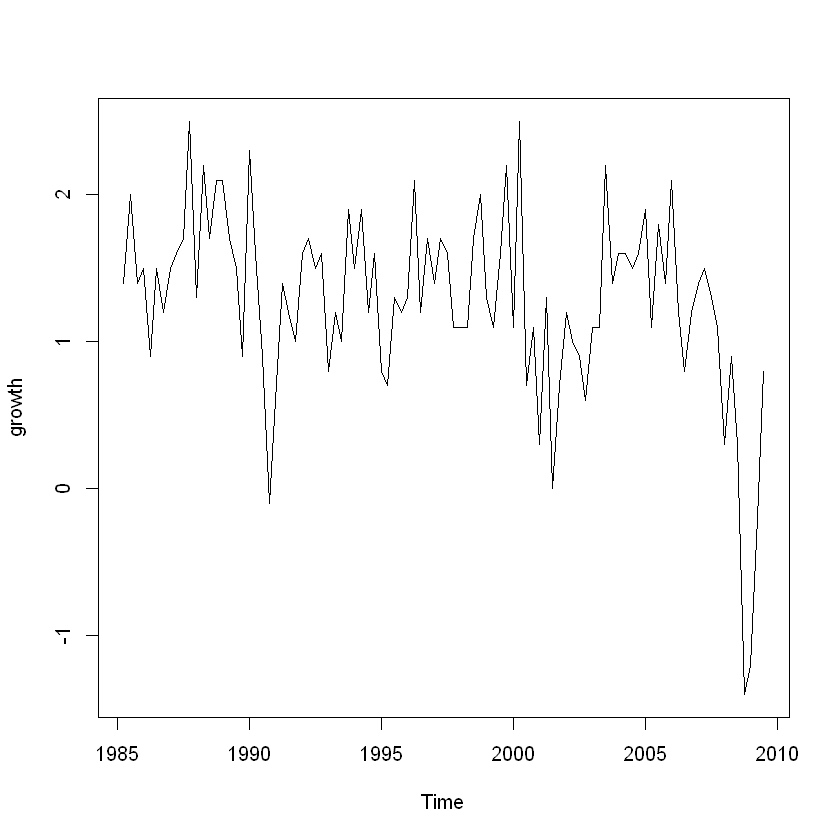

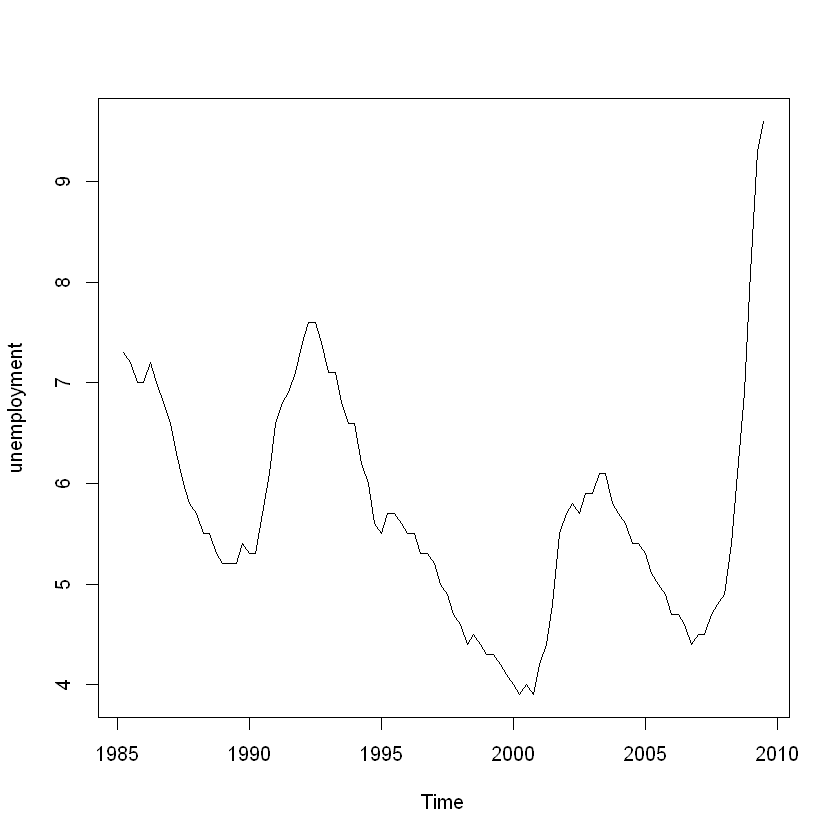

In [144]:
plot (okun.ts[,"g"], ylab="growth")
plot (okun.ts[,"u"], ylab="unemployment")

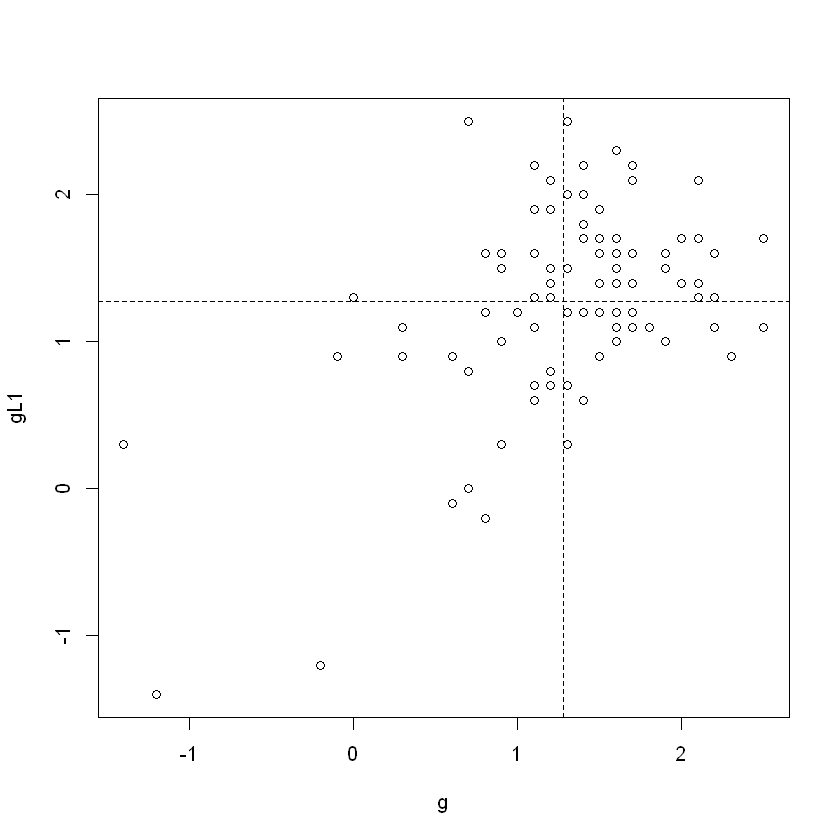

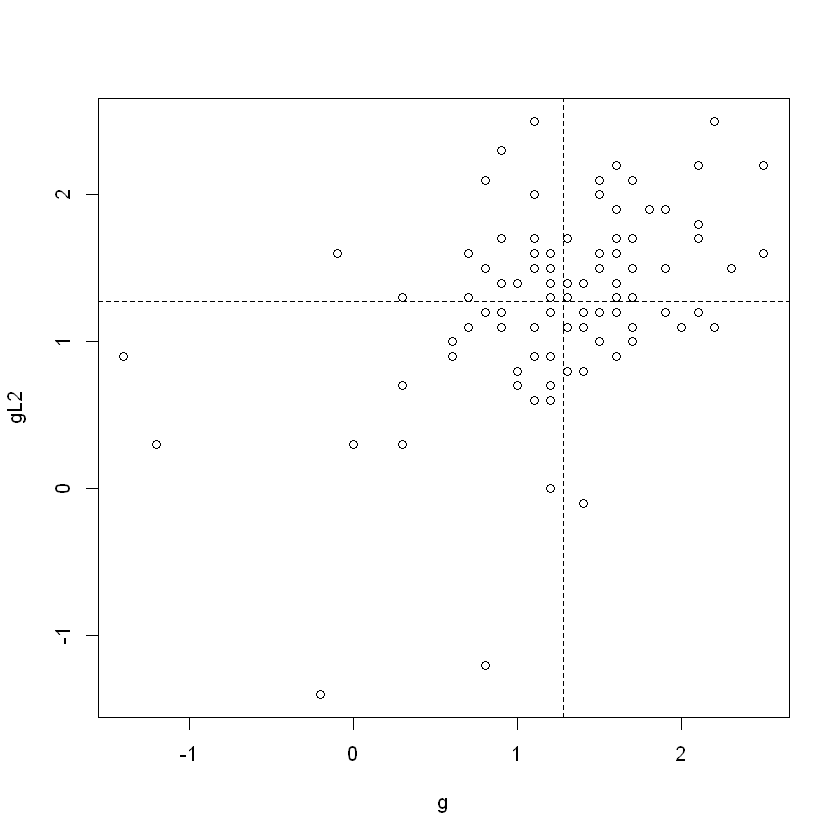

In [145]:
ggL1 <- data.frame ( cbind (okun.ts[,"g"], lag (okun.ts[,"g"],-1)))
names (ggL1) <- c ("g","gL1")
plot (ggL1)
meang <- mean (ggL1$g, na.rm=TRUE)
abline (v=meang, lty=2)
abline (h= mean (ggL1$gL1, na.rm=TRUE), lty=2)
# =================================================================
ggL2 <- data.frame ( cbind (okun.ts[,"g"], lag (okun.ts[,"g"],-2)))
names (ggL2) <- c ("g","gL2")
plot (ggL2)
meang <- mean (ggL2$g, na.rm=TRUE)
abline (v=meang, lty=2)
abline (h= mean (ggL2$gL2, na.rm=TRUE), lty=2)

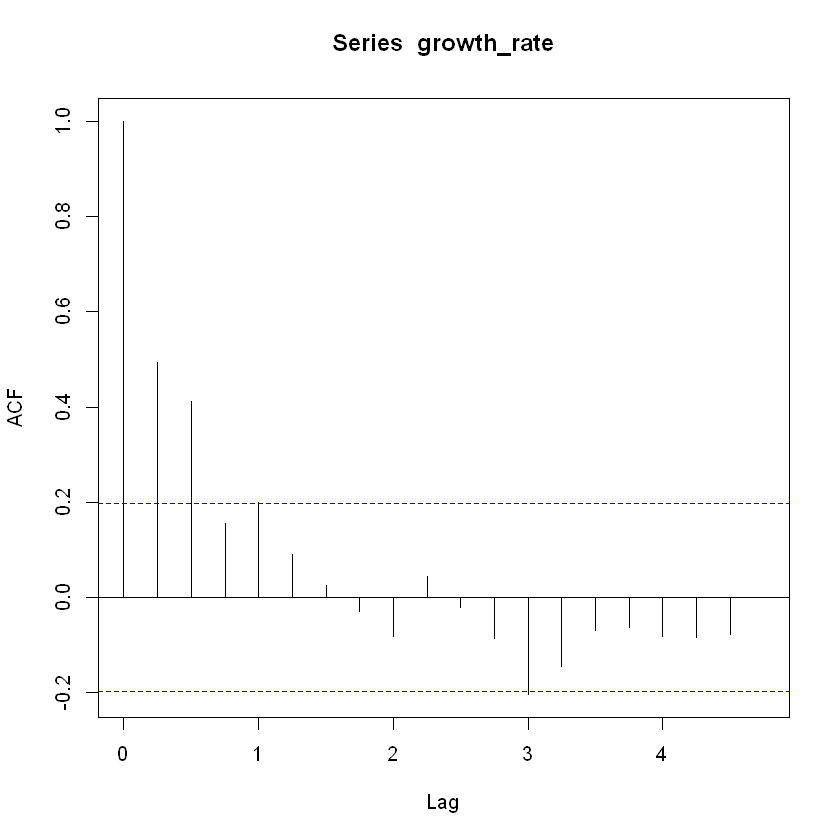

In [146]:
growth_rate <- okun.ts[,"g"]
acf (growth_rate)

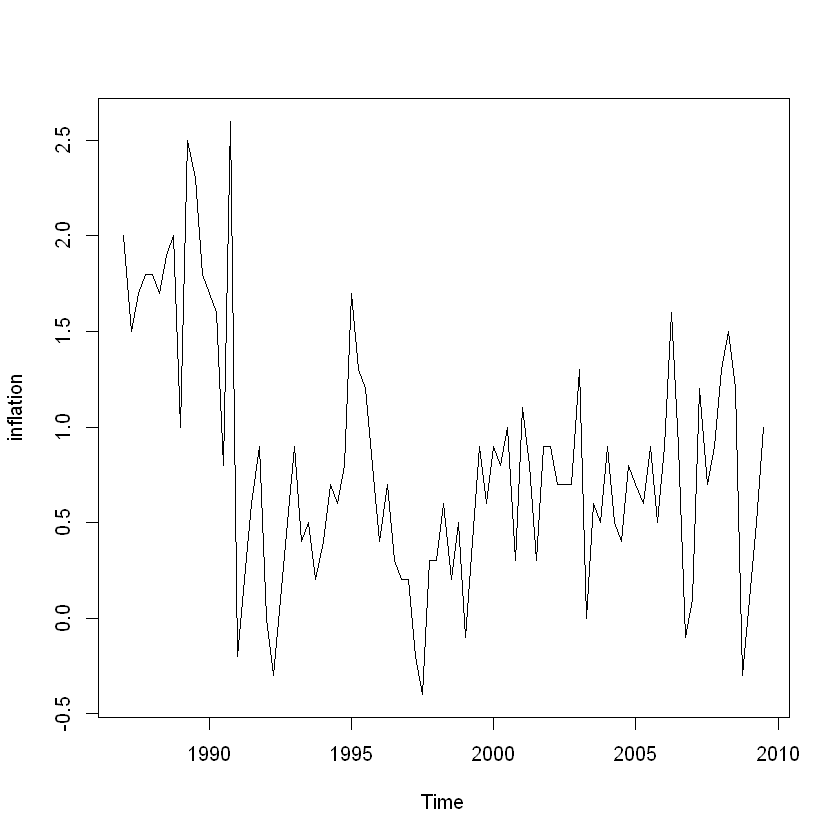

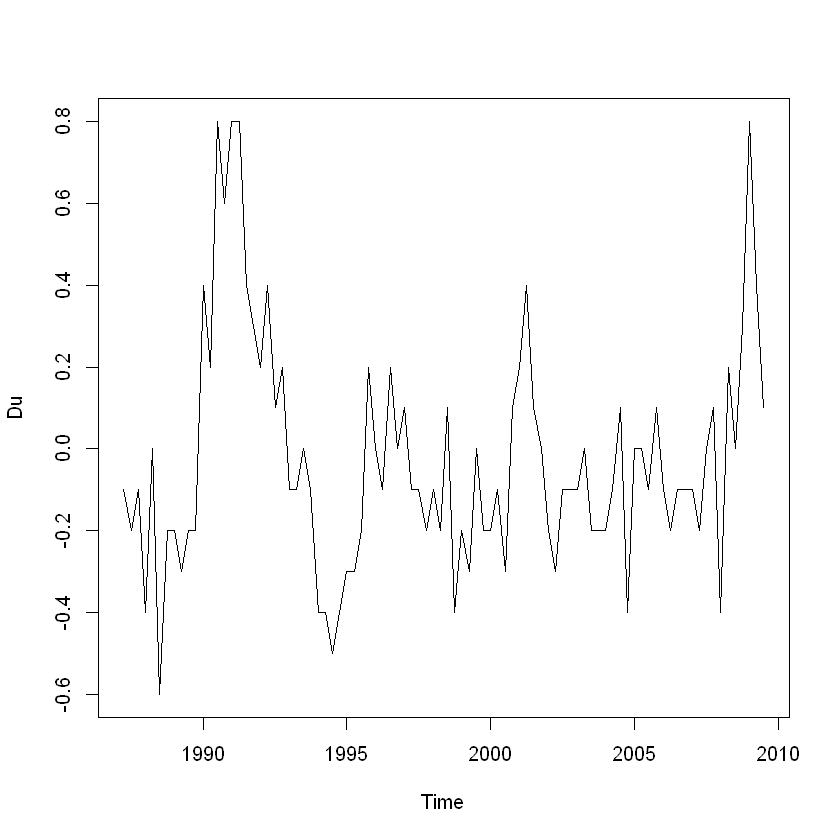

In [147]:
data ("phillips_aus", package="PoEdata")
phill.ts <- ts (phillips_aus,
start= c (1987,1),
end= c (2009,3),
frequency=4)
inflation <- phill.ts[,"inf"]
Du <- diff (phill.ts[,"u"])
plot (inflation)
plot (Du)



|term        |   estimate| std.error| statistic|   p.value|
|:-----------|----------:|---------:|---------:|---------:|
|(Intercept) |  0.7776213| 0.0658249| 11.813474| 0.0000000|
|diff(u)     | -0.5278638| 0.2294049| -2.301014| 0.0237539|

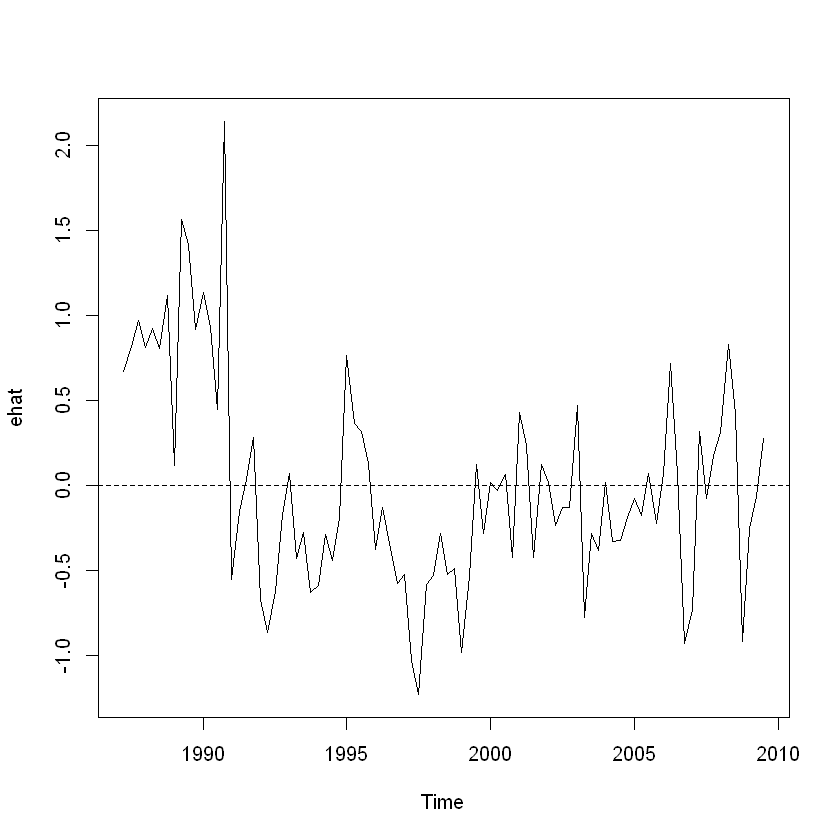

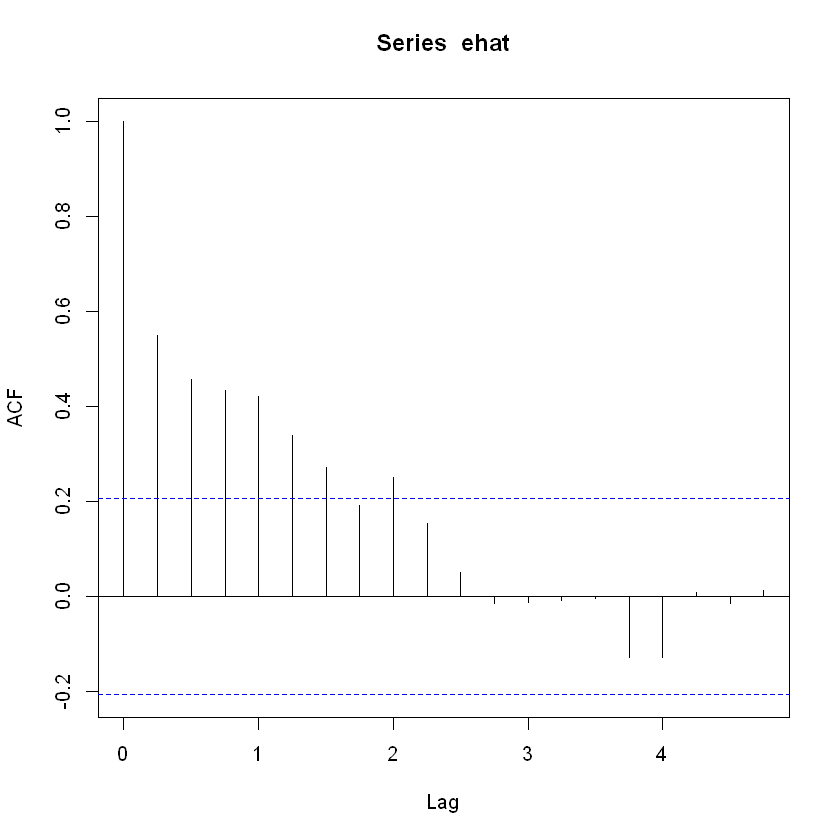

In [150]:
phill.dyn <- dynlm (inf~ diff (u),data=phill.ts)
ehat <- resid (phill.dyn)
kable ( tidy (phill.dyn), caption="Summary of the `phillips` model")
plot (ehat)
abline (h=0, lty=2)
corrgm <- acf (ehat)
plot (corrgm)
# 实际上，可以直接使用 bgtest() 函数【Breusch-Godfrey test】
a <- bgtest (phill.dyn, order=1, type="F", fill=0)
b <- bgtest (phill.dyn, order=1, type="F", fill=NA)
c <- bgtest (phill.dyn, order=4, type="Chisq", fill=0)
d <- bgtest (phill.dyn, order=4, type="Chisq", fill=NA)
dfr <- data.frame ( rbind (a[ c (1,2,4)],
b[ c (1,2,4)],
c[ c (1,2,4)],
d[ c (1,2,4)]
))
dfr <- cbind ( c ("1, F, 0",
"1, F, NA", "4, Chisq, 0", "4, Chisq, NA"), dfr)
names (dfr)<- c ("Method", "Statistic", "Parameters", "p-Value")
kable (dfr, caption="Breusch-Godfrey test for the Phillips example")
# 或者使用 dwtest() 函数【Durbin-Watson test(实际中，很少用了，因为诸多限制)】

### 9.4 Estimation with Serially Correlated Errors

In [153]:
# HAC, heterokesdasticity and autocorrelation consistent
library (sandwich)
s0 <- coeftest (phill.dyn)
s1 <- coeftest (phill.dyn, vcov.= vcovHAC (phill.dyn))
s2 <- coeftest (phill.dyn, vcov.= NeweyWest (phill.dyn))
s3 <- coeftest (phill.dyn, vcov.= kernHAC (phill.dyn))
tbl <- data.frame ( cbind (s0[ c (3,4)],s1[ c (3,4)],
s2[ c (3,4)],s3[ c (3,4)]))
names (tbl) <- c ("Incorrect","vcovHAC", "NeweyWest", "kernHAC")
row.names (tbl) <- c ("(Intercept", "Du")
kable (tbl, digits=3,
caption="Comparing standard errors for the Phillips model")



|           | Incorrect| vcovHAC| NeweyWest| kernHAC|
|:----------|---------:|-------:|---------:|-------:|
|(Intercept |     0.066|   0.095|     0.128|   0.131|
|Du         |     0.229|   0.304|     0.331|   0.335|

In [154]:
ehat <- resid (phill.dyn)
ac <- acf (ehat, plot=FALSE)
# The Phillips equation: five lag correlations in residuals
ac$acf[2:6]

[1] 0.5486586 0.4557325 0.4332158 0.4204936 0.3390342

### 9.5 Nonlinear Least Squares Estimation 

In [161]:
library (dynlm)
phill.dyn <- dynlm (inf~ diff (u), data=phill.ts)
# Non-linear AR(1) model with 'Cochrane-Orcutt method'nls'
phill.ts.tab <- cbind (phill.ts[,"inf"],
    phill.ts[,"u"],
    lag (phill.ts[,"inf"], -1),
    diff (phill.ts[,"u"], lag=1),
    lag ( diff (phill.ts[,2],lag=1), -1))
phill.dfr <- data.frame (phill.ts.tab)
names (phill.dfr) <- c ("inf", "u", "Linf", "Du", "LDu")
phill.nls <- nls (inf~b1*(1-rho)+b2*Du+rho*Linf-rho*b2*LDu,
    data=phill.dfr,
    start= list (rho=0.5, b1=0.5, b2=-0.5))
# ============================================
s1 # This is `phill.dyn` with HAC errors:
print('==============================================')
phill.dyn # The simple linear model:
print('==============================================')
phill.nls # The 'nls' model:
print('==============================================')
coef (phill.nls)[["rho"]]


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  0.777621   0.094854  8.1980 1.824e-12 ***
diff(u)     -0.527864   0.304444 -1.7339   0.08644 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] "=============================================="



Time series regression with "ts" data:
Start = 1987(2), End = 2009(3)

Call:
dynlm(formula = inf ~ diff(u), data = phill.ts)

Coefficients:
(Intercept)      diff(u)  
     0.7776      -0.5279  


[1] "=============================================="


Nonlinear regression model
  model: inf ~ b1 * (1 - rho) + b2 * Du + rho * Linf - rho * b2 * LDu
   data: phill.dfr
    rho      b1      b2 
 0.5574  0.7609 -0.6944 
 residual sum-of-squares: 23.2

Number of iterations to convergence: 3 
Achieved convergence tolerance: 8.06e-06

[1] "=============================================="


[1] 0.5573977

### 9.6 A more general model

In [164]:
s.nls <- summary (phill.nls)
phill.gen <- dynlm (inf~ L (inf)+ d (u)+ L ( d (u)),
data=phill.ts)
s.gen <- summary (phill.gen)
nlW <- nlWaldtest (phill.gen, texts="b[4]=-b[2]*b[3]") # nlWaldtest() function for Wald test in package nlWaldtest
phill1.gen <- dynlm (inf~ lag (inf, -1)+ diff (u)+ lag ( diff (u), -1), data=phill.ts)
kable ( tidy (phill.gen),caption="Using dynlm with L and d operators")
kable ( tidy (phill1.gen),caption="Using dynlm with lag and diff operators")



|term        |   estimate| std.error| statistic|   p.value|
|:-----------|----------:|---------:|---------:|---------:|
|(Intercept) |  0.3336325| 0.0899028|  3.711037| 0.0003677|
|L(inf)      |  0.5592676| 0.0907962|  6.159589| 0.0000000|
|d(u)        | -0.6881852| 0.2498704| -2.754169| 0.0071953|
|L(d(u))     |  0.3199526| 0.2575040|  1.242515| 0.2174635|



|term             |   estimate| std.error| statistic|   p.value|
|:----------------|----------:|---------:|---------:|---------:|
|(Intercept)      |  0.3336325| 0.0899028|  3.711037| 0.0003677|
|lag(inf, -1)     |  0.5592676| 0.0907962|  6.159589| 0.0000000|
|diff(u)          | -0.6881852| 0.2498704| -2.754169| 0.0071953|
|lag(diff(u), -1) |  0.3199526| 0.2575040|  1.242515| 0.2174635|

### 9.7 Autoregressive Models



|term        | estimate| std.error| statistic| p.value|
|:-----------|--------:|---------:|---------:|-------:|
|(Intercept) |   0.4657|    0.1433|    3.2510|  0.0016|
|L(g)        |   0.3770|    0.1000|    3.7692|  0.0003|
|L(g, 2)     |   0.2462|    0.1029|    2.3937|  0.0187|

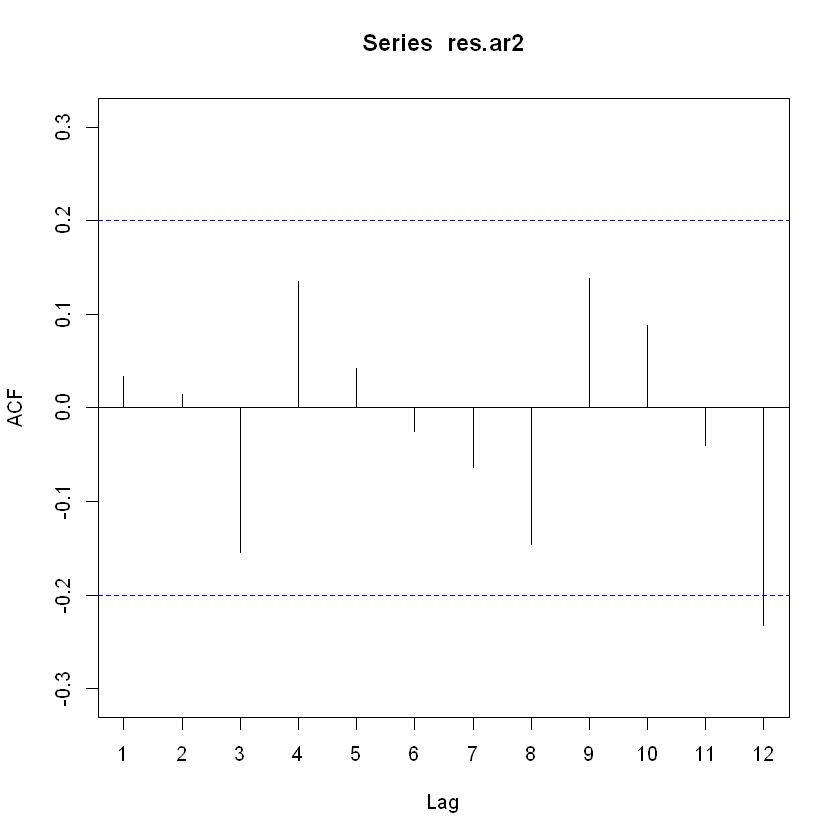

In [166]:
data (okun)
okun.ts <- ts (okun)
okun.ar2 <- dynlm (g~ L (g)+ L (g,2), data=okun.ts)
kable ( tidy (okun.ar2), digits=4,caption="Autoregressive model of order 2 using the dataset $okun$")
res.ar2 <- resid (okun.ar2)
Acf (res.ar2, lag.max=12) # New: Acf() from package forecast

In [167]:
aics <- rep (0,5)
bics <- rep (0,5)
y <- okun.ts[,"g"]
for (i in 1:5){
    ari <- dynlm (y~ L (y,1:i), start=i)
    aics[i] <- AIC (ari)
    bics[i] <- BIC (ari)
    }
tbl <- data.frame ( rbind (aics, bics))
names (tbl) <- c ("1","2","3","4","5")
row.names (tbl) <- c ("AIC","BIC")
kable (tbl, digits=1, align='c',caption="Lag order selection for an AR model")



|    |   1   |   2   |   3   |   4   |   5   |
|:---|:-----:|:-----:|:-----:|:-----:|:-----:|
|AIC | 169.4 | 163.5 | 163.1 | 161.6 | 162.5 |
|BIC | 177.1 | 173.8 | 175.9 | 176.9 | 180.3 |

### 9.8 Forecasting



|term        |  estimate| std.error| statistic|   p.value|
|:-----------|---------:|---------:|---------:|---------:|
|(Intercept) | 0.4657262| 0.1432576|  3.250970| 0.0016024|
|L(y, 1:2)1  | 0.3770015| 0.1000210|  3.769225| 0.0002874|
|L(y, 1:2)2  | 0.2462394| 0.1028688|  2.393723| 0.0186861|



|    | Point.Forecast| Lo.80| Hi.80|  Lo.95| Hi.95|
|:---|--------------:|-----:|-----:|------:|-----:|
|99  |          0.718| 0.021| 1.415| -0.348| 1.784|
|100 |          0.933| 0.188| 1.678| -0.206| 2.073|
|101 |          0.994| 0.202| 1.787| -0.218| 2.207|

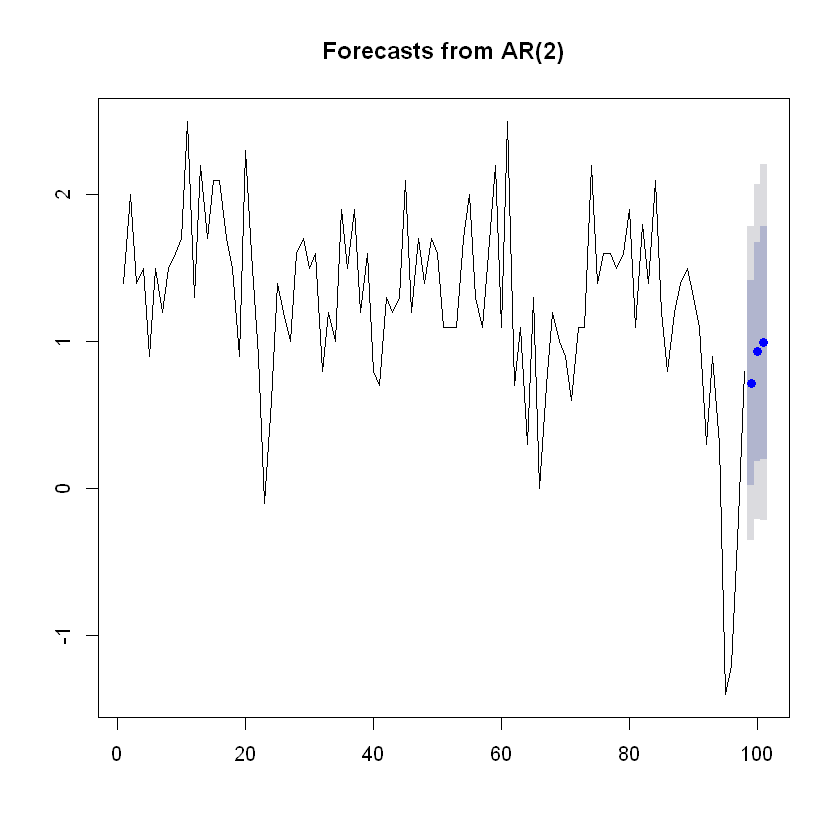

In [169]:
y <- okun.ts[,"g"]
g.ar2 <- dynlm (y~ L (y, 1:2))
kable ( tidy (g.ar2), caption="The AR(2) growth model")
ar2g <- ar (y, aic=FALSE, order.max=2, method="ols")
fcst <- data.frame ( forecast (ar2g, 3))
kable (fcst, digits=3,
caption="Forcasts for the AR(2) growth model")
plot ( forecast (ar2g,3))

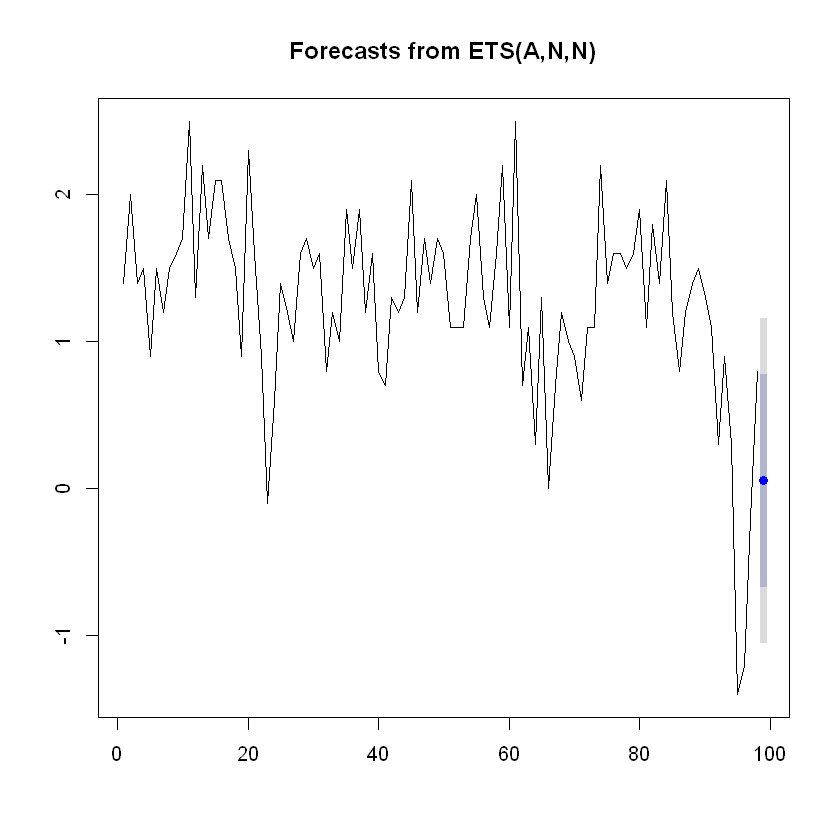

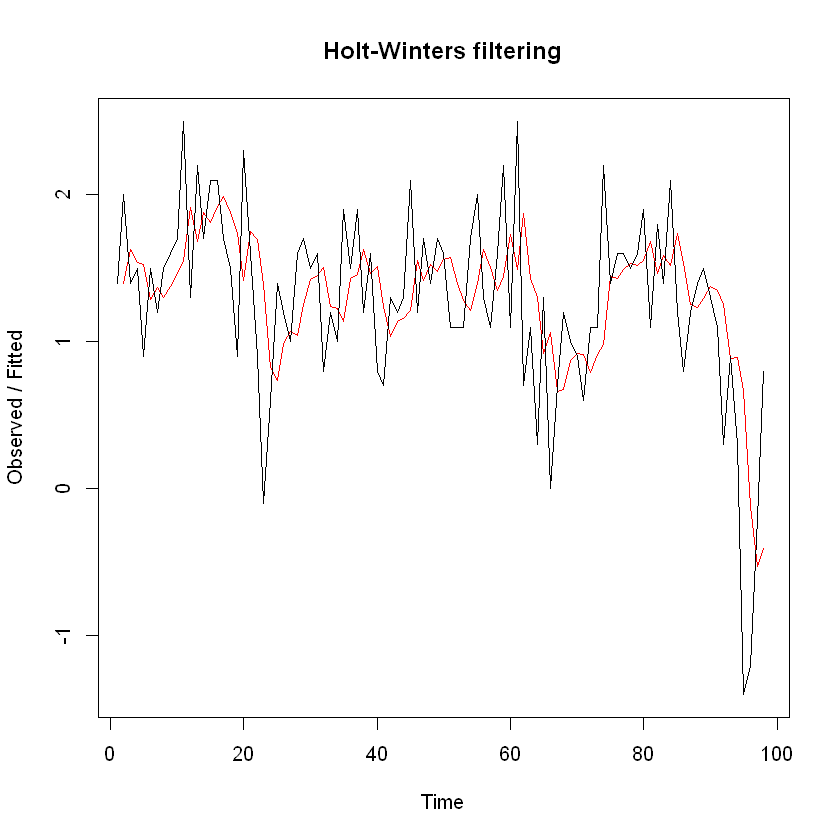

In [170]:
y <- okun.ts[,"g"]
okun.ets <- ets (y)
okunf.ets <- forecast (okun.ets,1) #one-period forecast
plot (okunf.ets)
okun.HW <- HoltWinters (y, beta=FALSE, gamma=FALSE)
plot (okun.HW)
okunf.HW <- forecast (okun.HW,1)

### 9.9 Multiplier Analysis

## Chapter 10 Random Regressors

In [171]:
rm (list= ls ()) #Removes all items in Environment!
library (AER) #for `ivreg()`
library (lmtest) #for `coeftest()` and `bptest()`.
library (broom) #for `glance(`) and `tidy()`
library (PoEdata) #for PoE4 datasets
library (car) #for `hccm()` robust standard errors
library (sandwich)
library (knitr) #for making neat tables with `kable()`
library (stargazer)

## Chapter 12 Time Series: Nonstationarity

In [172]:
rm (list= ls ()) #Removes all items in Environment!
library (tseries) # for ADF unit root tests
library (dynlm)
library (nlWaldTest) # for the `nlWaldtest()` function
library (lmtest) #for `coeftest()` and `bptest()`.
library (broom) #for `glance(`) and `tidy()`
library (PoEdata) #for PoE4 datasets
library (car) #for `hccm()` robust standard errors
library (sandwich)
library (knitr) #for kable()
library (forecast)